In [2]:
# Python library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
import sklearn.metrics as sm
from sklearn import metrics
from collections import Counter
import seaborn as sns
%matplotlib inline


             Age  YearlyTravel  StayDuration  PeopleDuringTravel  \
count  500.00000    500.000000    500.000000           500.00000   
mean    30.56400      3.200000      3.914000             5.04200   
std     13.02633      3.076838      2.236203             2.19131   
min     17.00000      0.000000      1.000000             0.00000   
25%     22.00000      2.000000      3.000000             4.00000   
50%     25.00000      3.000000      3.000000             5.00000   
75%     35.00000      4.000000      4.000000             6.00000   
max     70.00000     30.000000     21.000000            12.00000   

       LodgingBudget  
count     500.000000  
mean      497.548000  
std       258.143254  
min        50.000000  
25%       300.000000  
50%       450.000000  
75%       700.000000  
max      1500.000000  


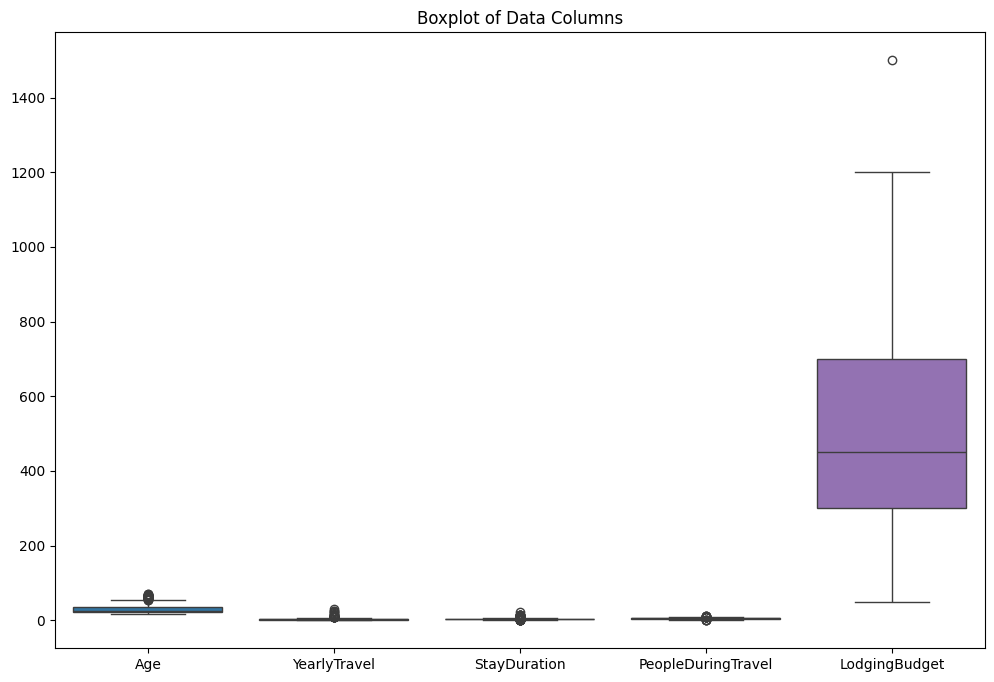

In [4]:
# Load the CSV file into a DataFrame
file_path = 'lodgingdata.csv'
df = pd.read_csv(file_path)

# Display basic statistics to identify potential outliers
print(df.describe())

# Visualize the data using box plots to identify outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.title('Boxplot of Data Columns')
plt.show()

In [5]:
import pandas as pd
dfCSV = pd.read_csv("lodgingdata.csv")

In [7]:
dfCSV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 500 non-null    int64 
 1   Gender              500 non-null    object
 2   Residential         500 non-null    object
 3   EmploymentStatus    500 non-null    object
 4   MaritalStatus       500 non-null    object
 5   HouseholdCategory   500 non-null    object
 6   OftenTravel         500 non-null    object
 7   TravellingFor       500 non-null    object
 8   YearlyTravel        500 non-null    int64 
 9   StayDuration        500 non-null    int64 
 10  PeopleDuringTravel  500 non-null    int64 
 11  LodgingBudget       500 non-null    int64 
 12  Seasons             500 non-null    object
 13  LodgingLocation     500 non-null    object
 14  LodgingType         500 non-null    object
dtypes: int64(5), object(10)
memory usage: 58.7+ KB


In [6]:
# Missing data
dfCSV.apply(lambda x: sum(x.isnull()),axis=0) 

Age                   0
Gender                0
Residential           0
EmploymentStatus      0
MaritalStatus         0
HouseholdCategory     0
OftenTravel           0
TravellingFor         0
YearlyTravel          0
StayDuration          0
PeopleDuringTravel    0
LodgingBudget         0
Seasons               0
LodgingLocation       0
LodgingType           0
dtype: int64

In [20]:
dfCSV.head(5)

,Age,Gender,Residential,Employment status,Marital status,Household category,Often travel,Travelling for,Times travel in a year,Stay duration,People during the travel,Accomodation budget,Seasons,Location of lodging,Factor of choice,Important facilities,Type of lodging
0,22,Female,Urban,Student,Single,M40,Yes,Holiday,3.0,4,4,3000,"Year-round, I travel regularly",City Centers,Close to public facilities,Free breakfast,Hotels
1,22,Female,Rural,Student,Single,B40,Yes,Holiday,3.0,3,7,200,Autumn,Nature,Price and Affordability,Swimming pool,Hotels
2,21,Female,Urban,Student,Single,B40,Yes,Holiday,2.0,3,6,700,Autumn,Beachfront,Price and Affordability,Ensuite bathroom,Airbnb
3,21,Male,Rural,Student,Single,B40,No,Holiday,2.0,5,4,500,Winter,City Centers,Safety and security,Free Wi-Fi,Airbnb
4,39,Male,Rural,Employed full-time,Married,M40,Yes,Both,4.0,7,6,3500,Winter,City Centers,Safety and security,Laundry facilities,Hotels


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       510 non-null    int64  
 1   Gender                    510 non-null    object 
 2   Residential               510 non-null    object 
 3   Employment status         510 non-null    object 
 4   Marital status            510 non-null    object 
 5   Household category        510 non-null    object 
 6   Often travel              510 non-null    object 
 7   Travelling for            510 non-null    object 
 8   Times travel in a year    510 non-null    float64
 9   Stay duration             510 non-null    int64  
 10  People during the travel  510 non-null    int64  
 11  Accomodation budget       510 non-null    int64  
 12  Seasons                   510 non-null    object 
 13  Location of lodging       510 non-null    object 
 14  Factor of 

<Axes: title={'center': 'Accomodation budget'}, xlabel='Household category'>

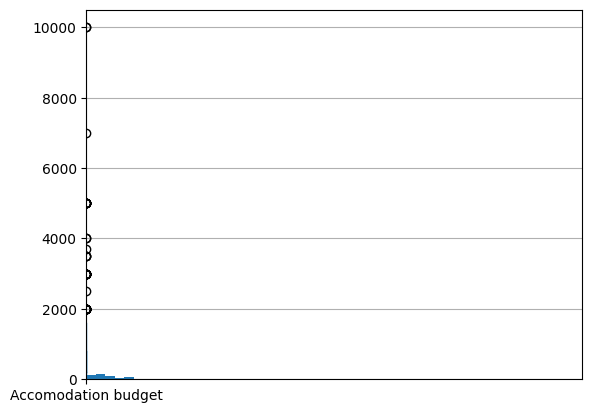

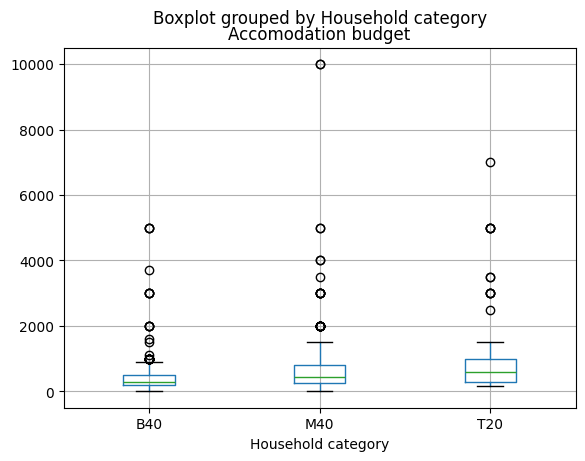

In [24]:
# Data preparation & # Data analysis
Counter(dfCSV['Type of lodging'])
dfCSV.shape
dfCSV.columns
dfCSV.info()
dfCSV['Accomodation budget'].hist(bins=50)
dfCSV.boxplot(column='Accomodation budget')
dfCSV.boxplot(column='Accomodation budget', by = 'Household category')

In [6]:
data = dfCSV['Accomodation budget'].value_counts(ascending=True)
print(data)

Accomodation budget
2500      1
3         1
1600      1
175       1
3700      1
1100      1
120       1
1200      1
50        1
781       1
90        1
7000      1
185       1
10000     2
650       2
900       2
4000      2
1         2
190       3
170       3
240       3
160       3
230       3
180       3
210       3
270       3
290       3
550       3
750       3
3500      3
450       3
280       4
220       4
260       4
350       8
5000      9
700      10
1500     10
800      13
3000     14
100      14
2000     17
600      19
150      21
250      22
400      26
1000     54
500      64
300      65
200      70
Name: count, dtype: int64


In [7]:
data = dfCSV['People during the travel'].value_counts(ascending=True)
print(data)

People during the travel
40      1
20      1
12      4
0       4
1      14
9      16
10     22
8      30
7      38
3      39
2      48
6      78
4      96
5     119
Name: count, dtype: int64


In [8]:
data = dfCSV['Stay duration'].value_counts(ascending=True)
print(data)

Stay duration
21      1
9       1
12      2
15      3
6       5
8       6
10     12
14     12
1      14
7      25
5      55
2      60
4      78
3     236
Name: count, dtype: int64


In [9]:
data = dfCSV['Times travel in a year'].value_counts(ascending=True)
print(data)

Times travel in a year
0.5       1
21.0      1
9.0       1
25.0      1
20.0      1
16.0      1
24.0      1
13.0      1
30.0      1
22.0      1
8.0       1
15.0      3
12.0      5
7.0       7
10.0     11
6.0      18
0.0      26
4.0      48
5.0      56
1.0      99
3.0     110
2.0     116
Name: count, dtype: int64


In [10]:
data = dfCSV['Age'].value_counts(ascending=True)
print(data)

Age
69     1
71     1
72     1
68     1
49     1
54     1
58     1
51     1
55     2
64     2
48     2
57     2
46     2
61     2
59     2
44     2
70     2
52     3
42     3
43     3
67     3
60     3
47     3
66     3
53     3
63     3
37     4
36     4
56     4
32     4
41     4
17     5
62     5
40     5
30     5
31     5
33     5
50     6
29     7
38     7
34     7
45     7
39     7
27     7
26     8
28    12
65    12
35    13
25    20
19    21
24    23
18    27
20    30
23    41
21    73
22    79
Name: count, dtype: int64


In [12]:
# Define a function to replace outliers with the median value
def replace_outliers_with_median(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    column = np.where((column < lower_bound) | (column > upper_bound), column.median(), column)
    return column

# Apply the function to each numeric column in the DataFrame
numeric_columns = df.select_dtypes(include=[np.number]).columns
df[numeric_columns] = df[numeric_columns].apply(replace_outliers_with_median)

# Display the DataFrame after replacing outliers with median
print(df)

      Age  Gender Residential   Employment status Marital status  \
0    22.0  Female       Urban             Student         Single   
1    22.0  Female       Rural             Student         Single   
2    21.0  Female       Urban             Student         Single   
3    21.0    Male       Rural             Student         Single   
4    39.0    Male       Rural  Employed full-time        Married   
..    ...     ...         ...                 ...            ...   
505  23.0    Male       Urban             Student         Single   
506  31.0    Male       Urban  Employed part-time         Single   
507  23.0    Male       Urban             Student         Single   
508  21.0  Female       Urban             Student         Single   
509  22.0  Female       Urban             Student         Single   

    Household category Often travel Travelling for  Times travel in a year  \
0                  M40          Yes        Holiday                     3.0   
1                  B40     

In [13]:
# Display basic statistics to identify potential outliers
print(df.describe())

              Age  Times travel in a year  Stay duration  \
count  510.000000              510.000000     510.000000   
mean    26.196078                2.700980       3.250980   
std      8.657235                1.568758       0.800141   
min     17.000000                0.000000       2.000000   
25%     21.000000                2.000000       3.000000   
50%     23.000000                3.000000       3.000000   
75%     28.000000                4.000000       4.000000   
max     56.000000                7.000000       5.000000   

       People during the travel  Accomodation budget  
count                510.000000           510.000000  
mean                   4.870588           449.149020  
std                    1.803434           304.231625  
min                    1.000000             1.000000  
25%                    4.000000           212.500000  
50%                    5.000000           400.000000  
75%                    6.000000           500.000000  
max                

In [14]:
# Save the cleaned DataFrame to a new CSV file
output_file_path = 'lodgingdatacleaned.csv'
df.to_csv(output_file_path, index=False)

print(f"Cleaned data saved to {output_file_path}")

Cleaned data saved to lodgingdatacleaned.csv
